# Week 5 Algorithmic Toolbox: Dynamic Programming I


## **1. Money Exchange again**
As we already know, a natural greedy strategy for the change problem does not work correctly for any set of
denominations. For example, if the available denominations are 1, 3, and 4, the greedy algorithm will change
6 cents using three coins (4 + 1 + 1) while it can be changed using just two coins (3 + 3). Your goal now is
to apply dynamic programming for solving the Money Change Problem for denominations 1, 3, and 4.
### **Problem Description**

**Input Format.** Integer money.

**Constraints.** 1 ≤ money ≤ $10^3$.

**Output Format.** The minimum number of coins with denominations 1, 3, 4 that changes money
### **Sample 1**
Input:

 2

Output: 

2
### **Sample 2**
Input:

34

Output: 

9


### **Code**

In [1]:
%%writefile moneychange.cpp
#include <iostream>
#include <vector>
using std::vector;


int main() {
  int m;
  std::cin >> m;
  vector<int> b(m+1);
  for(int c=0;c<=m+1;c++){
      b[c]=m*m;
  }
 
  b[0]=0;
  
  vector<int> den(3); 
  den={1,3,4};
  int tempCoins=0;

for(int i=1;i<m+1;i++){
    for(int j=0;j< 3 ;j++){
        if(i>=den[j]){
            tempCoins=b[i-den[j]]+1;
            if (tempCoins< b[i]){
                b[i]=tempCoins;
            }
        }
    }
}


  std::cout<< b[m] << '\n';
  
}

Writing moneychange.cpp


### **Sample 1** 

In [4]:
!g++ moneychange.cpp -o moneychange
!./moneychange


2
2


### **Sample 2** 

In [3]:
!g++ moneychange.cpp -o moneychange
!./moneychange


34
9


## **2.Primitive Calculator**
You are given a primitive calculator that can perform the following three operations with the current number 𝑥: multiply 𝑥 by 2, multiply 𝑥 by 3, or add 1 to 𝑥. Your goal is given a positive integer 𝑛, find the minimum number of operations needed to obtain the number 𝑛 starting from the number 1.

### **Problem Description**
**Task.**  Given an integer 𝑛, compute the minimum number of operations needed to obtain the number 𝑛 starting from the number 1.


**Input Format.** The input consists of a single integer 1 ≤ 𝑛 ≤ $10^6$


**Constraints.** 1 ≤ a,b ≤ $2*10^9$.

**Output Format.** In the first line, output the minimum number 𝑘 of operations needed to get 𝑛 from 1. In the second line output a sequence of intermediate numbers. That is, the second line should contain positive integers 𝑎0, 𝑎2, . . . , 𝑎𝑘−1 such that 𝑎0 = 1, 𝑎𝑘−1 = 𝑛 and for all 0 ≤ 𝑖 < 𝑘 − 1, 𝑎𝑖+1 is equal to either 𝑎𝑖 + 1, 2𝑎𝑖 , or 3𝑎𝑖 . If there are many such sequences, output any one of them.
### **Sample 1**
Input:

1

Output: 

0

1



### **Sample 2**
Input:

5

Output: 

3

1 2 4 5

### **Sample 3**
Input:

96234

Output: 

14

1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234


### **Code**

In [5]:
%%writefile primitiveCalc.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using std::vector;


vector<int> optimal_sequence(int n) {
  std::vector<int> sequence;
  std::vector<int> minimal(n+2);
  for(int c=0;c<=n+1;c++){
      minimal[c]=n*n;
  }
 
  minimal[0]=0;
  minimal[1]=0;
  int minOperations,tempsum1,tempmul2,tempmul3;
  

  for(int i=2;i<=n+1;i++){
      
      tempmul2=n;
      tempmul3= n;

      tempsum1=minimal[i-1]+1;

      if (i%2==0){
          
          tempmul2=minimal[i/2]+1;
          
      }
      if (i%3==0){
          
          tempmul3= minimal[i/3]+1;
      }

      
      if ((tempmul2<tempsum1) && (tempmul2<tempmul3)){
           minOperations=tempmul2;
           
      }
      else if ((tempmul3<=tempmul2) && ( tempmul3<tempsum1)){
           minOperations=tempmul3;
           
      }
      else{
          minOperations=tempsum1;
          
      }

      minimal[i]=minOperations;
       

  }
  std::cout << minimal[n] << "\n";

  if(n==1){
     std::cout<< n<< " "; 
  }
  else{
  while (n >= 1) {
    sequence.push_back(n);
    if ((n % 3 == 0 )and (minimal[n]-1==minimal[n/3])) {
      n /= 3;
      
    } 
    else if ((n % 2 == 0 )and (minimal[n]-1==minimal[n/2])) {
      n /= 2;
    } 
    else {
      n = n - 1;
      
    }
    
  }
  }
  reverse(sequence.begin(), sequence.end());
  
  
  return sequence;
}

int main() {
  int n;
  std::cin >> n;
  
  vector<int> sequence = optimal_sequence(n);
  


  for (size_t i = 0; i < sequence.size(); ++i) {
    std::cout << sequence[i] << " ";

  } 
  
  
      
  
}

Writing primitiveCalc.cpp


### **Sample 1** 

In [9]:
!g++ primitiveCalc.cpp -o primitiveCalc
!./primitiveCalc

1
0
1 

### **Sample 2** 

In [10]:
!g++ primitiveCalc.cpp -o primitiveCalc
!./primitiveCalc

5
3
1 2 4 5 

### **Sample 3** 

In [11]:
!g++ primitiveCalc.cpp -o primitiveCalc
!./primitiveCalc

96234
14
1 3 9 10 11 22 66 198 594 1782 5346 16038 16039 32078 96234 

## **3. Edit Distance**
The edit distance between two strings is the minimum number of operations (insertions, deletions, and
substitutions of symbols) to transform one string into another. It is a measure of similarity of two strings.
Edit distance has applications, for example, in computational biology, natural language processing, and spell
checking. Your goal in this problem is to compute the edit distance between two strings.

### **Problem Description**
**Task.**  The goal of this problem is to implement the algorithm for computing the edit distance between two
strings.



**Input Format.** Each of the two lines of the input contains a string consisting of lower case latin letters.



**Constraints.** Each of the two lines of the input contains a string consisting of lower case latin letters.


**Output Format.** Output the edit distance between the given two strings.
### **Sample 1**
Input:

ab

ab

Output: 

0



### **Sample 2**
Input:

short

ports


Output: 

3

### **Sample 3**
Input:

editing
distance

Output: 

5


### **Code**

In [12]:
%%writefile editdistance.cpp
#include <iostream>
#include <string>
#include <cstring>

using std::string;
using namespace std;
int minim(int ins, int dele, int matchormiss){
    int m=0;
    int v[3];
    v[0]=ins;
    v[1]=dele;
    v[2]=matchormiss;
 
    for (int i = 0; i < 3; i++){
        if (i == 0 || m > v[i])
            {m = v[i];}
 }
    
    return m;
}

int edit_distance(const string &str1, const string &str2) {
    
  char first[str1.size()+1];

  strcpy(first, str1.c_str());

  char second[str2.size()+1];

  strcpy(second, str2.c_str());
  

  int matriz[str1.size()+1][str2.size()+1];

  for (int i=0;i<str1.size()+1;i++){
      matriz[i][0]=i;
  }
  for (int i=0;i<str2.size()+1;i++){
      matriz[0][i]=i;
  }
  int insertion;
  int deletion;
  int missmatch;
  int match;


  for (int i=1;i<str1.size()+1;i++){
      for (int j=1;j<str2.size()+1;j++){
            insertion = matriz[i][j-1]+ 1;
            deletion  = matriz[i-1][j]+ 1;
            missmatch  = (matriz[i-1][j-1])+ 1;
            match     = matriz[i-1][j-1];
            if (first[i-1]==second[j-1]){
                matriz[i][j]=minim(insertion,deletion,match);
            }
            else if(first[i-1]!=second[j-1]){
                matriz[i][j]=minim(insertion,deletion,missmatch);
            }
      }
      
  }

  int total;
  total= matriz[str1.size()][str2.size()];

  return total;
}

int main() {
  string str1;
  string str2;
  std::cin >> str1 >> str2;
  int n=0;
  n=edit_distance(str1, str2);
  std::cout << edit_distance(str1, str2) << std::endl;
  return 0;
}


Writing editdistance.cpp


### **Sample 1** 

In [16]:
!g++ editdistance.cpp -o editdistance
!./editdistance

ab
ab
0


### **Sample 2** 

In [17]:
!g++ editdistance.cpp -o editdistance
!./editdistance

short
ports
3


### **Sample 3** 

In [18]:
!g++ editdistance.cpp -o editdistance
!./editdistance

editing
distance
5


# **Coursera Submition**

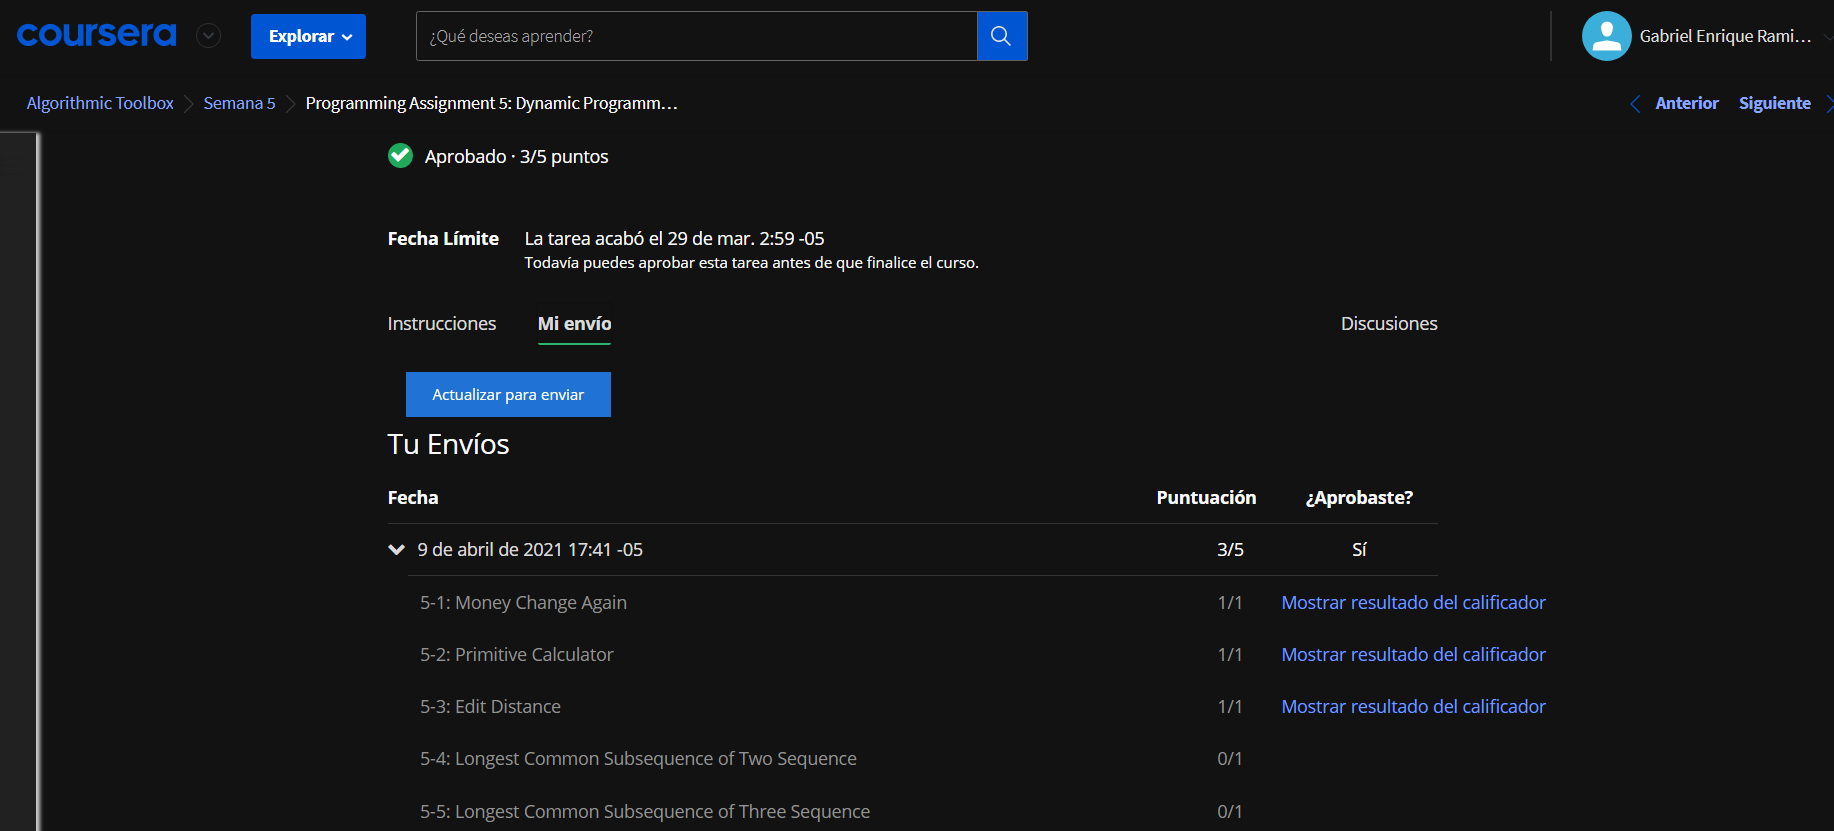